<a href="https://colab.research.google.com/github/jocelynandrade18/Repositorio2.-/blob/main/XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **XOR**

In [1]:
import numpy as np # Importaremos los datos en Numpy

# Datos XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]]) #Tenemos una Matriz de 4 filas y 2 columnas que contiene las cuatro posibles combinaciones de entrada para la función lógica XOR
y = np.array([[0],[1],[1],[0]]) # Una matriz de 4 filas y 2 columnas que contiene las cuatro posibles combinaciones de entrada para la función lógica


In [2]:
from tensorflow.keras.models import Sequential  # Permite apilar capas secuencialmente (una tras otra).
from tensorflow.keras.layers import Dense # Importa la clase Dense que es una capa densa o completamente conectada, donde cada neurona está conectada a todas las neuronas

modelo = Sequential([ # Definimos el modelo Sequential y se le pasa una lista []
    Dense(4, activation='relu', input_dim=2), # Crea una capa con 4 neuronas, le asigna la función de activación ReLU, Indica que esta capa espera 2 valores de entrada
    Dense(1, activation='sigmoid') # Crea una capa con 1 neurona. Esto es necesario porque el problema XOR solo tiene una salida
]) # Cierra la lista de capas


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
from tensorflow.keras.optimizers import Adam # Los optimizadores ajustan los pesos de la red para minimizar el error

# Tasa de aprendizaje deseada
learning_rate = 0.001 # Indica el propósito de la siguiente línea con 0.001 controla que tan grande son los pasos
adam_optimizer = Adam(learning_rate=learning_rate) # Pasa la tasa de aprendizaje previamente definida


In [4]:
modelo.compile( # Inicia el proceso de compilación para el modelo Sequential
    optimizer=adam_optimizer, # Este optimizador es el responsable de ajustar los pesos de la red durante el entrenamiento
    loss='binary_crossentropy', # Define la función de pérdida (donde la salida es 0 o 1, como en el problema XOR).
    metrics=['accuracy'] # Esta métrica se imprimirá durante el entrenamiento, pero no afecta directamente cómo el modelo aprende
) # Finaliza la compilación.


# Entrenar el modelo

In [5]:
history = modelo.fit( # La función fit() entrena el modelo y devuelve un objeto
    X, y, #Entrena el X1 X2
    epochs=50, #Epocas que quiere que entrenen
    verbose=1, # Un valor de 1 (el más común) significa que mostrará una barra de progreso animada por cada época
)  # Finaliza la ejecución


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step - accuracy: 0.5000 - loss: 0.7417
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2500 - loss: 0.7410
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2500 - loss: 0.7403
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2500 - loss: 0.7397
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2500 - loss: 0.7390
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2500 - loss: 0.7383
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2500 - loss: 0.7377
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2500 - loss: 0.7370
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2500 - loss: 0.7363
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2500 - loss: 0.7357
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2500 - loss: 0.7350
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2500 - loss: 0.7344


# Gráficando la función de pérdida

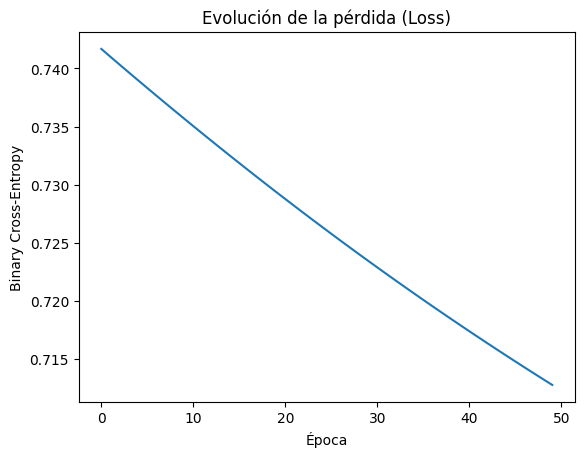

In [6]:
import matplotlib.pyplot as plt # Realizamos la gráfica

plt.plot(history.history['loss']) # historial (history) guardado durante el entrenamiento para extraer los valores de pérdida
plt.title('Evolución de la pérdida (Loss)') # Asigna un título al gráfico
plt.xlabel('Época') # Etiqueta el eje horizontal con "Época"
plt.ylabel('Binary Cross-Entropy') # Etiqueta el eje vertical
plt.show() # Visualiza el gráfico

#**Evaluación**

Evaluar el modelo en el conjunto de prueba

In [7]:
loss, accuracy = modelo.evaluate(X, y) # Se le pasa el conjunto de datos de entrada (X) y las salidas deseadas (y). El modelo calcula sus predicciones para X y luego las compara con y
print(f'Loss: {loss}, Accuracy: {accuracy}') # Imprime en la consola los dos valores obtenidos

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.2500 - loss: 0.7123
Loss: 0.7122722864151001, Accuracy: 0.25


#**Predicción**

Hacer predicciones y comparar las predicciones con los valores reales

In [8]:
pred = (modelo.predict(X) > 0.5).astype(int) # El modelo genera una predicción (un número entre 0 y 1, gracias a la activación Sigmoid) para cada una de las 4 entradas de X. 2. > 0.5
for i, (inp, p) in enumerate(zip(X, pred)): # utiliza zip() para emparejar cada entrada (inp de X) con su predicción correspondiente (p de pred) en el índice i
    print(f"{inp} -> {p[0]}") # la entrada de dos valores (inp) y la predicción de un solo valor


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
[0 0] -> 1
[0 1] -> 0
[1 0] -> 0
[1 1] -> 0
